In [1]:
#Libs for fetching and analysing data

#Libs
import pandas as pa
import seaborn as sns
import geopandas as gpd
import owslib
import descartes
import numpy as np

#make point from excel
from shapely import wkt
from shapely.geometry import Point
from geopandas.tools import sjoin

import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

In [2]:
###START OF ANALYSIS OF GROUND WATER###
median_gv = pa.read_csv('C://Users/crefsgaard/Desktop/Struensee/grundvandsstand2050median.txt',sep=' ',\
                        skiprows=6, names=range(910), decimal=',', index_col=False)

toer_gv = pa.read_csv('C://Users/crefsgaard/Desktop/Struensee/grundvandsstand2050toer.txt',sep=' ',\
                        skiprows=6, names=range(910), decimal=',', index_col=False)

vaad_gv = pa.read_csv('C://Users/crefsgaard/Desktop/Struensee/grundvandsstand2050vaad.txt',sep=' ',\
                        skiprows=6, names=range(910), decimal=',', index_col=False)

In [3]:
median_gv = median_gv.fillna(-9998)
toer_gv = toer_gv.fillna(-9998)
vaad_gv = vaad_gv.fillna(-9998)

In [4]:
median_gv.head()

,0,1,2,3,4,5,6,7,8,9,...,900,901,902,903,904,905,906,907,908,909
0,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
1,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
2,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
3,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
4,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999


In [5]:
#constants
ncols = 910
nrows = 746
xllcorner = 439000
yllcorner = 6035000
cellsize  = 500

In [6]:
#creating x coordinates
median_gv.columns = [xllcorner+n*cellsize for n in range(ncols)]
toer_gv.columns = [xllcorner+n*cellsize for n in range(ncols)]
vaad_gv.columns = [xllcorner+n*cellsize for n in range(ncols)]

In [7]:
#creating y coordinates
median_gv.index = [yllcorner+n*cellsize for n in range(nrows)][::-1]
toer_gv.index = [yllcorner+n*cellsize for n in range(nrows)][::-1]
vaad_gv.index = [yllcorner+n*cellsize for n in range(nrows)][::-1]

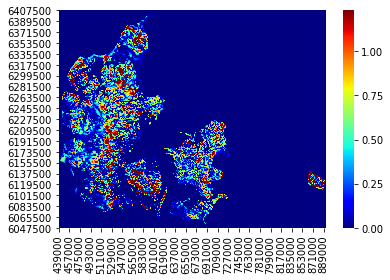

In [8]:
sns.heatmap(median_gv.dropna(), robust=1, vmin=0, cmap='jet')

In [9]:
bygninger = pa.read_csv("X://C_PUB/Trafik- og byggestyrelsen/2019 - Analyse af renoveringsbehov i den almene sektor/08 Dataindsamling og -behandling/1. Udtræk/1.4 ENS/Bygning_koordinater.csv", sep=';')
bygninger = bygninger[(bygninger['geox'].notnull()) | (bygninger['geoy'].notnull() )]

len(bygninger)
#bygninger.head()


78598

In [27]:
#Find bygningernes nærmeste koordinatsæt
import tqdm
bygninger['xmatrix'] = bygninger.geox.apply(lambda x : np.argmin(abs(median_gv.columns -x)))
bygninger['ymatrix'] = bygninger.geoy.apply(lambda y : np.argmin(abs(median_gv.index -y)))
all_values=[]
for row in bygninger.loc[:,['xmatrix','ymatrix']].values:
    all_values.append(median_gv.values[row[1],row[0]])
bygninger['grundvand'] = all_values

del bygninger['ymatrix']
del bygninger['xmatrix']
bygninger.to_excel('vand1.xlsx')

In [28]:
bygninger['xmatrix'] = bygninger.geox.apply(lambda x : np.argmin(abs(toer_gv.columns -x)))
bygninger['ymatrix'] = bygninger.geoy.apply(lambda y : np.argmin(abs(toer_gv.index -y)))
all_values=[]
for row in tqdm.tqdm(bygninger.loc[:,['xmatrix','ymatrix']].values):
    all_values.append(toer_gv.values[row[1],row[0]])
bygninger['grundvand_toer'] = all_values

del bygninger['ymatrix']
del bygninger['xmatrix']
bygninger.to_excel('vand2.xlsx')

100%|███████████████████████████████████████████████████████████████████████████| 78598/78598 [04:16<00:00, 306.76it/s]


In [29]:
bygninger['xmatrix'] = bygninger.geox.apply(lambda x : np.argmin(abs(vaad_gv.columns -x)))
bygninger['ymatrix'] = bygninger.geoy.apply(lambda y : np.argmin(abs(vaad_gv.index -y)))
all_values=[]
for row in tqdm.tqdm(bygninger.loc[:,['xmatrix','ymatrix']].values):
    all_values.append(vaad_gv.values[row[1],row[0]])
bygninger['grundvand_vaad'] = all_values

del bygninger['ymatrix']
del bygninger['xmatrix']
bygninger.to_excel('vand3.xlsx')

100%|███████████████████████████████████████████████████████████████████████████| 78598/78598 [04:05<00:00, 320.65it/s]


In [10]:
###START PÅ NEDBØRSDATA###

# URL for WFS backend
url = "http://wfs2-miljoegis.mim.dk/dai/ows"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layer = list(wfs.contents)[-1]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [11]:
data.head()

,ogc_fid,id,omr_navn,omr_nr,fejl,indenfosd,bekendt,anl_navn,anl_id,url_anlaeg,omr_kode,link,geometry
0,1,17,Haderslev_Syd,320364,None,1,2014-1,I/S Sdr. Vilstrup Vandværk,116325,http://data.geus.dk/JupiterWWW/anlaeg.jsp?anla...,320364,http://jupiter.geus.dk/Rapportdb/Grundvandsrap...,"(POLYGON ((533118.99658534 6115989.99792342, 5..."
1,2,21,Haderslev_Syd,320364,None,1,2014-1,Kelstrup Overby Vandværk I/S,116318,http://data.geus.dk/JupiterWWW/anlaeg.jsp?anla...,320364,http://jupiter.geus.dk/Rapportdb/Grundvandsrap...,"(POLYGON ((535928.18558342 6116449.18215799, 5..."
2,5,0,Gærum,320388,None,1,2014-1,Stenhøj Vandværk,70680,http://data.geus.dk/JupiterWWW/anlaeg.jsp?anla...,320388,http://jupiter.geus.dk/Rapportdb/Grundvandsrap...,"(POLYGON ((582344.60979557 6360821.37795918, 5..."
3,6,0,Brønderslev,320395,None,1,2014-1,Jerslev Vandværk,72092,http://data.geus.dk/JupiterWWW/anlaeg.jsp?anla...,320395,http://jupiter.geus.dk/Rapportdb/Grundvandsrap...,"(POLYGON ((565979.84052407 6351844.48030166, 5..."
4,7,0,Brønderslev,320395,None,1,2014-1,Klæstrup Vandværk I/S,72096,http://data.geus.dk/JupiterWWW/anlaeg.jsp?anla...,320395,http://jupiter.geus.dk/Rapportdb/Grundvandsrap...,"(POLYGON ((563311.9635688 6349444.93872141, 56..."


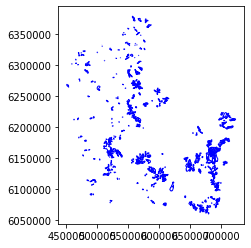

In [12]:
data.plot(color = 'white', edgecolor = 'blue')

In [13]:
#make geometry points
bygninger2 = gpd.GeoDataFrame(bygninger, geometry = gpd.points_from_xy(bygninger.geox, bygninger.geoy))
bygninger2.head()

,f06,afdnr,recordkey,ekomnr,f101,f201,bygningnoegle,geox,geoy,_merge,impute_geox,impute_geoy,impute,geometry
0,1,1,R1377C3F29FD15CBBC1256CD7005A566A,510.0,20997.0,3.0,92e12c55-0607-4147-a93d-0754ac30d1c1,519065.09,6122281.5,matched (3),519065.09,6122281.5,0,POINT (519065.09 6122281.5)
1,1,1,R1377C3F29FD15CBBC1256CD7005A566A,510.0,20997.0,10.0,80e09353-05ea-4629-9e82-a46385787b92,519065.09,6122281.5,matched (3),519065.09,6122281.5,0,POINT (519065.09 6122281.5)
2,1,1,R1377C3F29FD15CBBC1256CD7005A566A,510.0,20997.0,12.0,1464793f-8169-4215-822d-a33d4f98ab09,519065.09,6122281.5,matched (3),519065.09,6122281.5,0,POINT (519065.09 6122281.5)
3,1,1,R1377C3F29FD15CBBC1256CD7005A566A,510.0,20997.0,4.0,8c09197a-2d01-448b-998a-1fcf78c78bc4,519065.09,6122281.5,matched (3),519065.09,6122281.5,0,POINT (519065.09 6122281.5)
4,1,1,R1377C3F29FD15CBBC1256CD7005A566A,510.0,20997.0,6.0,e502394a-5ce7-4242-ba5e-79dd1a61ab1d,519065.09,6122281.5,matched (3),519065.09,6122281.5,0,POINT (519065.09 6122281.5)


In [14]:
#Vælg kun polygon data:
data3 = data.loc[:, ['geometry']]
data3.head()

,geometry
0,"(POLYGON ((533118.99658534 6115989.99792342, 5..."
1,"(POLYGON ((535928.18558342 6116449.18215799, 5..."
2,"(POLYGON ((582344.60979557 6360821.37795918, 5..."
3,"(POLYGON ((565979.84052407 6351844.48030166, 5..."
4,"(POLYGON ((563311.9635688 6349444.93872141, 56..."


In [15]:
#Vælg kun point data:
bygninger3 = bygninger2.loc[:, ['geometry']]
bygninger3.head()

,geometry
0,POINT (519065.09 6122281.5)
1,POINT (519065.09 6122281.5)
2,POINT (519065.09 6122281.5)
3,POINT (519065.09 6122281.5)
4,POINT (519065.09 6122281.5)


In [16]:
bygninger3.geometry

0        POINT (519065.09 6122281.5)
1        POINT (519065.09 6122281.5)
2        POINT (519065.09 6122281.5)
3        POINT (519065.09 6122281.5)
4        POINT (519065.09 6122281.5)
                    ...             
87150         POINT (562311 6259137)
87151         POINT (562311 6259137)
87152         POINT (562311 6259137)
87153         POINT (562311 6259137)
87167      POINT (597508.63 6079280)
Name: geometry, Length: 78598, dtype: object

In [17]:
import tqdm
i = -1
check_list = [0]*len(bygninger3)

for pt in tqdm.tqdm(bygninger3.geometry):
    i = i+1
    point = pt
    for poly in data3.geometry:
        polygon = poly
        if polygon.contains(point):
            check_list[i] = 1
        else: 
            pass

100%|███████████████████████████████████████████████████████████████████████████| 78598/78598 [03:43<00:00, 352.08it/s]


In [18]:
print(sum(check_list))

4713


In [116]:
bygninger3['check'] = check_list
print(bygninger3)

                          geometry  check
0      POINT (519065.09 6122281.5)      0
1      POINT (519065.09 6122281.5)      0
2      POINT (519065.09 6122281.5)      0
3      POINT (519065.09 6122281.5)      0
4      POINT (519065.09 6122281.5)      0
...                            ...    ...
87150       POINT (562311 6259137)      0
87151       POINT (562311 6259137)      0
87152       POINT (562311 6259137)      0
87153       POINT (562311 6259137)      0
87167    POINT (597508.63 6079280)      0

[78598 rows x 2 columns]


In [118]:
bygninger3.to_excel('RegnMM.xlsx')

In [24]:
#test af spatial join - mere efficient end ovenstående

#Giver det samme, men idet der er overlappende polygoner, hvor nogle punkter befinder sig i mere end ét polygon, får vi en
#længere dataframe end ovenfor. Ser vi på unikke index_right værdier ser vi dog, at antal unikke værdier er det samme
#som ovenfor

#Trying with "spatial join"
#buildings_in_areas = gpd.sjoin(data3, bygninger3, how="inner", op='intersects')
#buildings_in_areas

,geometry,index_right
0,"(POLYGON ((533118.99658534 6115989.99792342, 5...",6147
0,"(POLYGON ((533118.99658534 6115989.99792342, 5...",6139
0,"(POLYGON ((533118.99658534 6115989.99792342, 5...",6133
0,"(POLYGON ((533118.99658534 6115989.99792342, 5...",6134
0,"(POLYGON ((533118.99658534 6115989.99792342, 5...",6137
...,...,...
707,"(POLYGON ((606063.3926429 6113500.00475431, 60...",81905
707,"(POLYGON ((606063.3926429 6113500.00475431, 60...",81942
707,"(POLYGON ((606063.3926429 6113500.00475431, 60...",81925
707,"(POLYGON ((606063.3926429 6113500.00475431, 60...",81947


In [28]:
len(np.unique(buildings_in_areas['index_right']))

4713